# ECDF of New Brunswick Weather Stations

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filename_Fredericton = 'Data/Data_Weather_FrederictonA_1952_2010.csv'
filename_Harvey = 'Data/Data_Weather_Harvey_1921_2003.csv'

data_Fredericton = pd.read_csv(filename_Fredericton)

data_Harvey = pd.read_csv(filename_Harvey)

In [8]:
data_Fredericton.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [28]:
min_Fred_Year = min(data_Fredericton['Year'])
max_Fred_Year = max(data_Fredericton['Year'])

min_Har_Year = min(data_Harvey['Year'])
max_Har_Year = max(data_Harvey['Year'])

f'The Fredericton data spans {min_Fred_Year} to {max_Fred_Year} and the Harvey data spans {min_Har_Year} to {max_Har_Year}.'

'The Fredericton data spans 1952 to 2009 and the Harvey data spans 1921 to 2003.'

In [34]:
Fred_select = data_Fredericton['Year'].between(1955, 2003, inclusive=True)
Har_select = data_Harvey['Year'].between(1955, 2003, inclusive=True)

Fred_trim = data_Fredericton[Fred_select]
Har_trim = data_Harvey[Har_select]

rain_Fred.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
1096,-66.53,45.87,FREDERICTON A,8101500,1955-01-01,1955,1,1,NaN,-3.9,...,0.0,T,0.0,T,30.0,NaN,NaN,NaN,NaN,NaN
1097,-66.53,45.87,FREDERICTON A,8101500,1955-01-02,1955,1,2,NaN,-3.9,...,11.9,NaN,11.9,NaN,30.0,NaN,NaN,NaN,NaN,NaN
1098,-66.53,45.87,FREDERICTON A,8101500,1955-01-03,1955,1,3,NaN,-1.7,...,0.0,T,0.0,T,41.0,NaN,NaN,NaN,NaN,NaN
1099,-66.53,45.87,FREDERICTON A,8101500,1955-01-04,1955,1,4,NaN,-2.8,...,1.3,NaN,1.3,NaN,41.0,NaN,NaN,NaN,NaN,NaN
1100,-66.53,45.87,FREDERICTON A,8101500,1955-01-05,1955,1,5,NaN,-1.7,...,0.0,NaN,0.0,NaN,41.0,NaN,NaN,NaN,NaN,NaN


Define ecdf function

In [9]:
def ecdf(data):
    """
    Compute ECDF for a one-dimensional array of measurements
    """
    
    # Number of data points: n
    n = len(data)
    
    # sorted values
    x = np.sort(data)
    
    # evenly spaced datapoints with the maximum of 1
    y = np.arange(1, n+1) / n
    
    return x,y

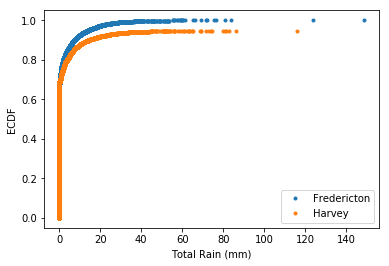

In [35]:
# Compute ECDFs
x_Fred, y_Fred = ecdf(Fred_trim['Total Rain (mm)'])
x_Har, y_Har = ecdf(Har_trim['Total Rain (mm)'])

# Plot all ECDFs on the same plot
_ = plt.plot(x_Fred, y_Fred, marker = '.', linestyle = 'none')
_ = plt.plot(x_Har, y_Har, marker = '.', linestyle = 'none')

# Annotate the plot
plt.legend(('Fredericton', 'Harvey'), loc='lower right')
_ = plt.xlabel('Total Rain (mm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()